<h2 style='color:blue' align='center'>Criminal Face Recognition System<h2>

In [70]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now we move on to detect face and eyes

In [71]:
original_image_path = r"C:\Users\Hp\Desktop\Coding\CDAC_Pashan_AI\PROJECTS\Old Projects\Criminal_Face_Recognition_System\CFRS_data_code_files\images_dataset\Al_Capone.jfif"

img = cv2.imread(original_image_path)
img.shape

(581, 351, 3)

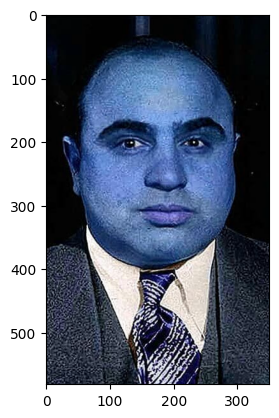

In [72]:
plt.imshow(img)

In [73]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(581, 351)

In [74]:
gray

array([[24, 24, 24, ..., 27, 27, 27],
       [ 6,  6,  6, ...,  5,  5,  5],
       [ 0,  0,  0, ...,  2,  2,  2],
       ...,
       [75, 31,  4, ..., 45, 57, 65],
       [57, 33,  5, ..., 64, 61, 59],
       [44, 50, 38, ..., 84, 82, 81]], dtype=uint8)

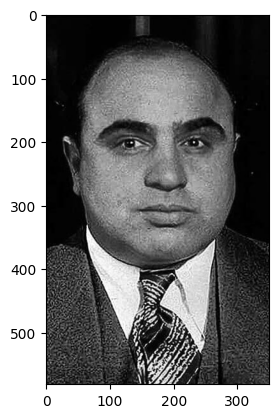

In [75]:
plt.imshow(gray, cmap='gray')

In [76]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\Hp\Desktop\Coding\CDAC_Pashan_AI\PROJECTS\Old Projects\Criminal_Face_Recognition_System\CFRS_data_code_files\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\Hp\Desktop\Coding\CDAC_Pashan_AI\PROJECTS\Old Projects\Criminal_Face_Recognition_System\CFRS_data_code_files\model\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 48,  91, 270, 270]])

In [77]:
(x,y,w,h) = faces[0]
x,y,w,h

(48, 91, 270, 270)

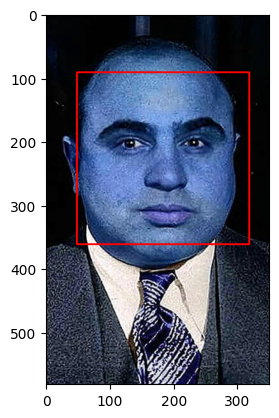

In [78]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

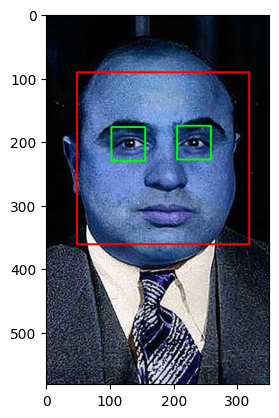

In [79]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

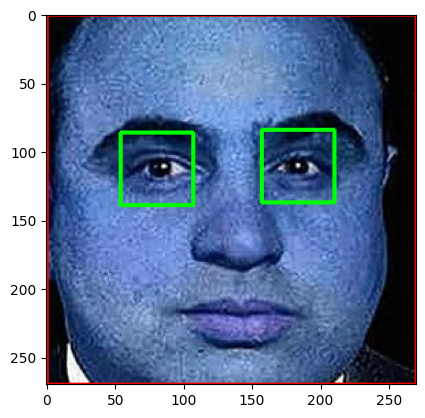

In [80]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [81]:
# def get_cropped_image_if_2_eyes(image_path):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyes) >= 2:
#             return roi_color

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

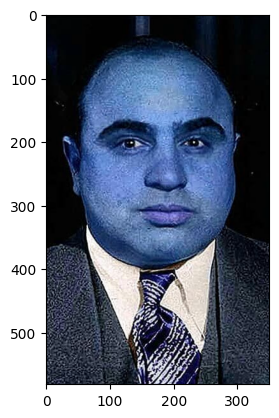

In [82]:
original_image = cv2.imread(original_image_path)
plt.imshow(original_image)

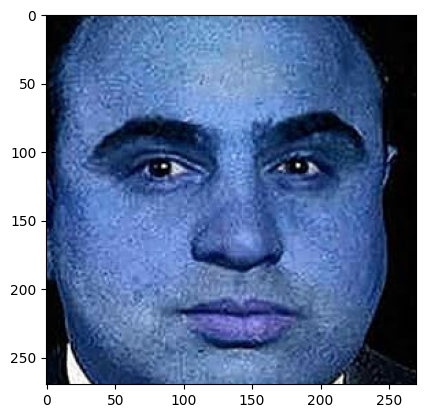

In [83]:
cropped_image = get_cropped_image_if_2_eyes(original_image_path)
plt.imshow(cropped_image)

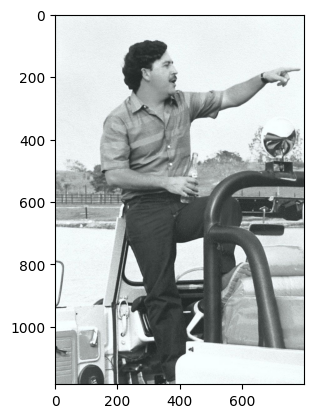

In [84]:
obstructed_image_path = r"C:\Users\Hp\Desktop\Coding\CDAC_Pashan_AI\PROJECTS\Old Projects\Criminal_Face_Recognition_System\CFRS_data_code_files\images_dataset\Pablo_Escobar_-_Google_Search\PE2.jfif"
org_image_obstructed = cv2.imread(obstructed_image_path)
plt.imshow(org_image_obstructed)

In [85]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(obstructed_image_path)
cropped_image_no_2_eyes

In [86]:
path_to_data = r"C:\Users\Hp\Desktop\Coding\CDAC_Pashan_AI\PROJECTS\Old Projects\Criminal_Face_Recognition_System\CFRS_data_code_files\images_dataset"
path_to_cr_data = r"C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\cropped"


In [87]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [88]:
img_dirs

['C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\Al_Baghdadi_-_Google_Search',
 'C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\Al_Capone_-_Google_Search',
 'C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\Dawood_Ibrahim_-_Google_Search',
 'C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\Pablo_Escobar_-_Google_Search']

In [89]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [90]:
cropped_image_dirs = []
criminal_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    criminal_name = img_dir.split('\\')[-1]
    print(criminal_name)
    
    criminal_file_names_dict[criminal_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + "\\" + criminal_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = criminal_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            criminal_file_names_dict[criminal_name].append(cropped_file_path)
            count += 1    

Al_Baghdadi_-_Google_Search
Generating cropped images in folder:  C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\cropped\Al_Baghdadi_-_Google_Search
Al_Capone_-_Google_Search
Generating cropped images in folder:  C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\cropped\Al_Capone_-_Google_Search
Dawood_Ibrahim_-_Google_Search
Generating cropped images in folder:  C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\cropped\Dawood_Ibrahim_-_Google_Search
Pablo_Escobar_-_Google_Search
Generating cropped images in folder:  C:\\Users\\Hp\\Desktop\\Coding\\CDAC_Pashan_AI\\PROJECTS\\Old Projects\\Criminal_Face_Recognition_System\\CFRS_data_code_files\\images_dataset\\cropped\Pablo_Escobar_-_Google_Search
